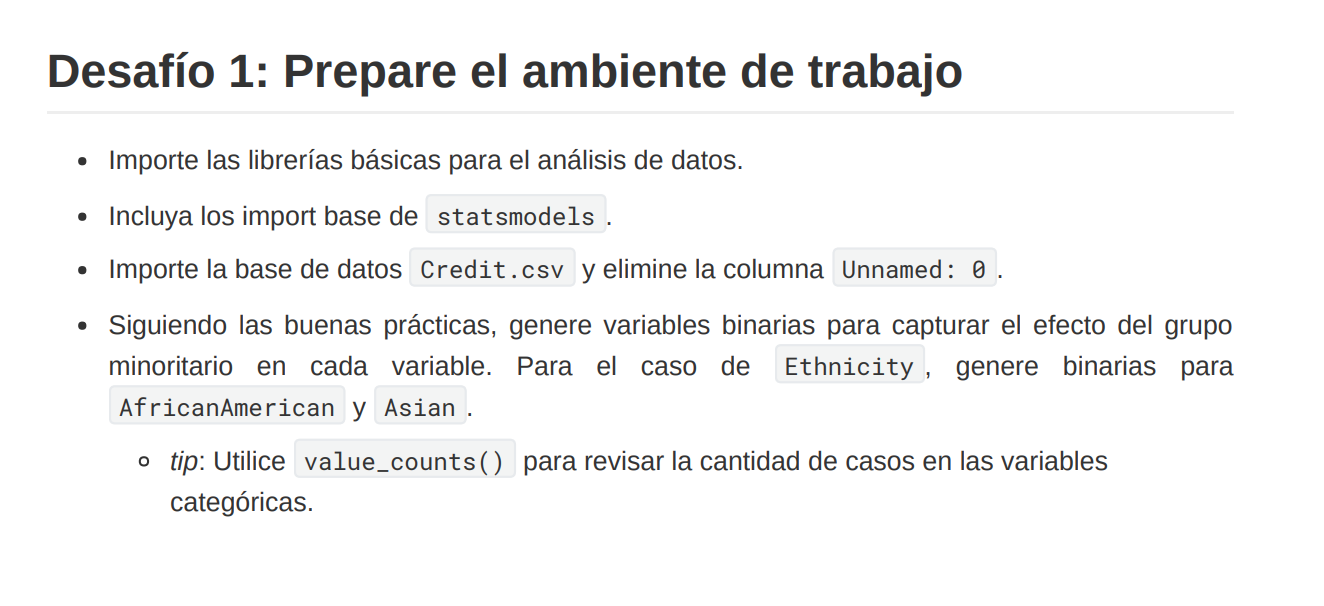

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [32]:
df = pd.read_csv('Credit.csv').drop("Unnamed: 0", axis = 1)

In [33]:
df.head(5)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

#### Variables binarias: Gender, Student, Married, Ethnicity

In [34]:
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [35]:
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [36]:
df['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [37]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [38]:
df['Gender_binarize'] = np.where(df['Gender'] == ' Male', 1, 0)
df['Student_binarize'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Married_binarize'] = np.where(df['Married'] == 'Yes', 1, 0)
df['AfricanAmerican_binarize'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Asian_binarize'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)

In [39]:
df

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0     14.891   3606     283      2   34         11    Male      No     Yes   
1    106.025   6645     483      3   82         15  Female     Yes     Yes   
2    104.593   7075     514      4   71         11    Male      No      No   
3    148.924   9504     681      3   36         11  Female      No      No   
4     55.882   4897     357      2   68         16    Male      No     Yes   
..       ...    ...     ...    ...  ...        ...     ...     ...     ...   
395   12.096   4100     307      3   32         13    Male      No     Yes   
396   13.364   3838     296      5   65         17    Male      No      No   
397   57.872   4171     321      5   67         12  Female      No     Yes   
398   37.728   2525     192      1   44         13    Male      No     Yes   
399   18.701   5524     415      5   64          7  Female      No      No   

            Ethnicity  Balance  Gender_binarize  Student_binarize  \
0           Caucasian      333                1                 0   
1               Asian      903                0                 1   
2               Asian      580                1                 0   
3               Asian      964                0                 0   
4           Caucasian      331                1                 0   
..                ...      ...              ...               ...   
395         Caucasian      560                1                 0   
396  African American      480                1                 0   
397         Caucasian      138                0                 0   
398         Caucasian        0                1                 0   
399             Asian      966                0                 0   

     Married_binarize  AfricanAmerican_binarize  Asian_binarize  
0                   1                         0               0  
1                   1                         0               1  
2                   0                         0               1  
3                   0                         0               1  
4                   1                         0               0  
..                ...                       ...             ...  
395                 1                         0               0  
396                 0                         1               0  
397                 1                         0               0  
398                 1                         0               0  
399                 0                         0               1  

[400 rows x 16 columns]

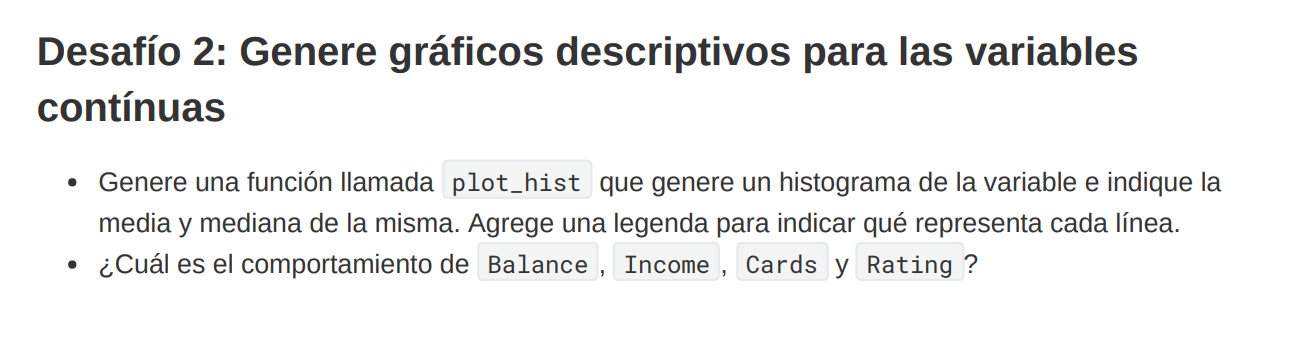

In [46]:
def plot_hist(dataframe, variable):
    
    hist_1 = dataframe[variable].dropna()
   
    sns.distplot(hist_1, kde=False, bins=10, color='lightgrey')
    plt.axvline(np.mean(hist_1), label = "Mean", color = "tomato")
    plt.axvline(np.median(hist_1), label = "Mediana", color = "green")
    plt.legend()
    


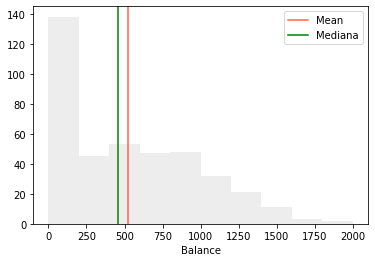

In [47]:
plot_hist(df, "Balance")

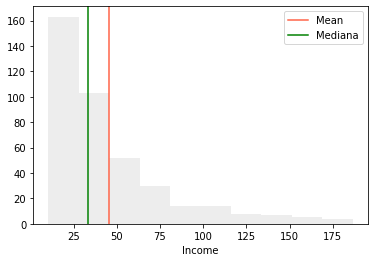

In [48]:
plot_hist(df, "Income")

In [49]:
plot_hist(df, "Cards")

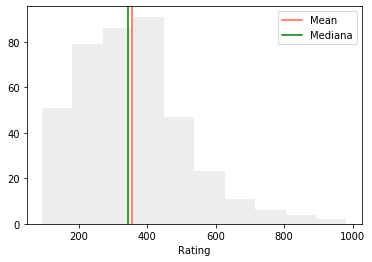

In [50]:
plot_hist(df, "Rating")

<font color=blue>¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?</font> **Balance:** Hay muchas personas con poco promedio de deuda en tarjeta de crédito de usuario, lo que hace que la curva se cargue mucho a la izquierda. En general mientras más dueda, menos personas.
**Income:** similar a lo anterior, con mayor ingreso, menor cantidad de personas con dicho ingreso. Hay una distinción notable entre mediana y media. 
**Cards** A pesar que Cards es categórica, la mediana calza con la media (3 tarjetas por persona). Es discreta, sin embargo se ve normalizada
**Rating:** el histograma calza mejor con la curva normal y la media es similar a la mediana. La distribución se parece normal.

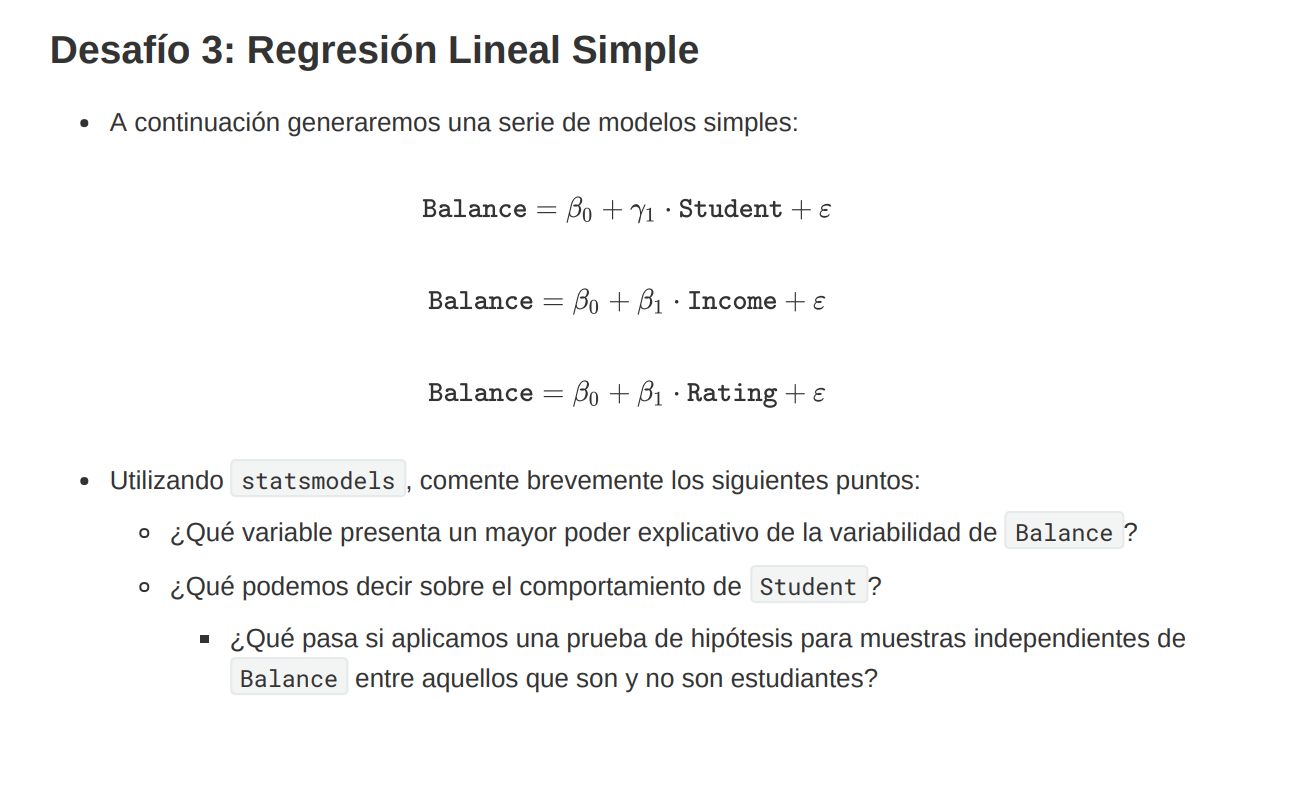

In [59]:
model1 = smf.ols('Balance ~ Student_binarize', df)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.49e-07
Time:                        20:59:59   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          480.3694     23.434     20.499      0.000     434.300     526.439
Student_binarize   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model2 = smf.ols('Balance ~ Income', df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.03e-22
Time:                        20:59:53   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model3 = smf.ols('Balance ~ Rating', df)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          1.90e-120
Time:                        20:59:46   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=blue>¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?</font> La variable con mayor poder explicativo es el **Rating** con un **74,6%**(R-squared = 0.746 vs 0.215 vs 0.067



<font color=blue>¿Qué podemos decir sobre el comportamiento de Student ?</font> Teniendo en cuenta poco poder explicativo de **6,7%**, podemos decir que en la variable de student_binarize, ser estudiante, aumenta en **396.4556** el promedio de deuda en comparación con alguien que no es estudiante. 

<font color=blue>¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de
Balance entre aquellos que son y no son estudiantes?</font> Se puede concluir al planear un test de hipotesis para muestras independientes que la deuda de los estudiantes con respecto a los que no lo son es significativamente distinta.

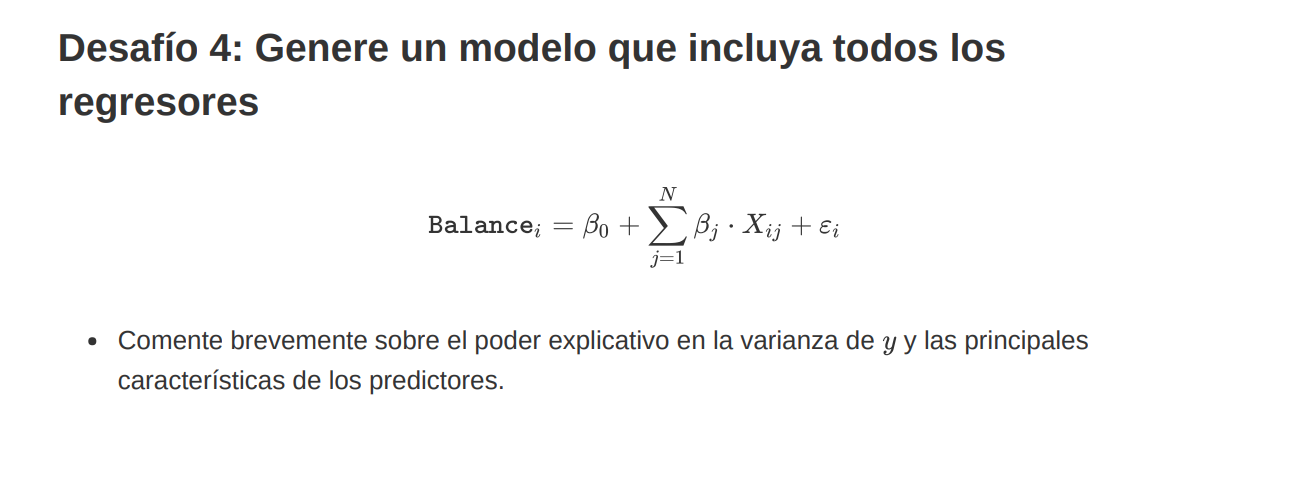

In [60]:
model4= smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_binarize + Student_binarize + Married_binarize + AfricanAmerican_binarize + Asian_binarize ', df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          1.11e-253
Time:                        21:00:14   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income                      -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                        0.1909      0.033      5.824      0.000       0.126       0.255
Rating                       1.1365      0.491      2.315      0.021       0.171       2.102
Cards                       17.7245      4.341      4.083      0.000       9.190      26.259
Age                         -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                   -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_binarize             10.6532      9.914      1.075      0.283      -8.839      30.145
Student_binarize           425.7474     16.723     25.459      0.000     392.869     458.626
Married_binarize            -8.5339     10.363     -0.824      0.411     -28.908      11.841
AfricanAmerican_binarize   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Asian_binarize               6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=blue>Comente brevemente sobre el poder explicativo en la varianza de y las principales
características de los predictores.</font> El poder explicativo de todos los regresores es significativa al 95%(el valor p es menor a 0.05) Los predictores mas significativos son Income, Limit, Rating, Cards, Student.



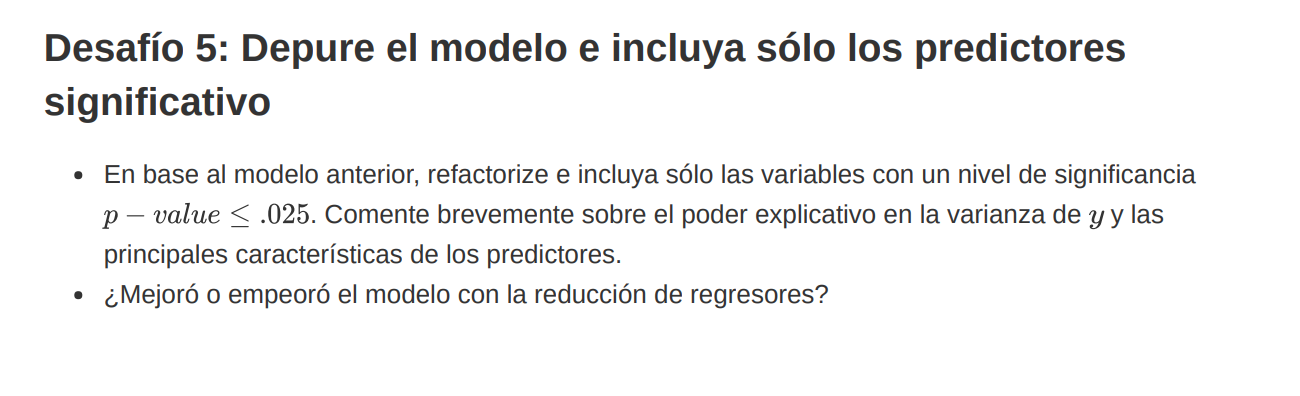


In [61]:
model5= smf.ols('Balance ~ Income + Limit + Rating + Cards + Student_binarize', df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          3.60e-261
Time:                        21:50:09   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income              -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit                0.1944      0.033      5.977      0.000       0.130       0.258
Rating               1.0879      0.487      2.234      0.026       0.130       2.045
Cards               17.8517      4.335      4.118      0.000       9.329      26.374
Student_binarize   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model6= smf.ols('Balance ~ Income + Limit + Cards + Student_binarize', df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2029.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          8.94e-262
Time:                        23:57:41   Log-Likelihood:                -2405.4
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     395   BIC:                             4841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -499.7272     15.890    -31.449      0.000    -530.967    -468.488
Income              -7.8392      0.232    -33.780      0.000      -8.295      -7.383
Limit                0.2666      0.004     75.271      0.000       0.260       0.274
Cards               23.1754      3.639      6.368      0.000      16.021      30.330
Student_binarize   429.6064     16.611     25.862      0.000     396.949     462.264
==============================================================================
Omnibus:                       34.751   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.363
Skew:                           0.771   Prob(JB):                     1.04e-09
Kurtosis:                       3.319   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=blue> Comente brevemente sobre el poder explicativo en la varianza de y las
principales características de los predictores.
¿Mejoró o empeoró el modelo con la reducción de regresores?</font> Se puede concluir el modelo que mejor se ajusta es el último, en comparación con el anterior que tenía un p valor mayor a 0.026(**Rating**). El valor de R-squared no cambia mucho al quitar el Rating, reenforzando el poco poder explicativo de esa variable. 

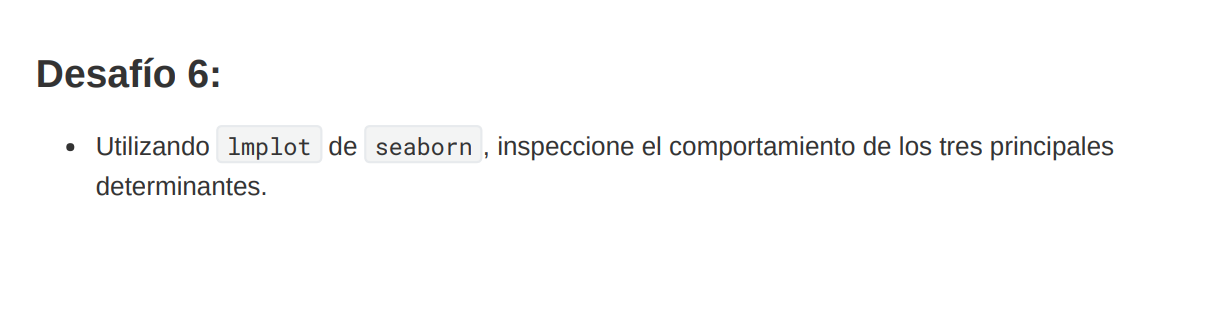

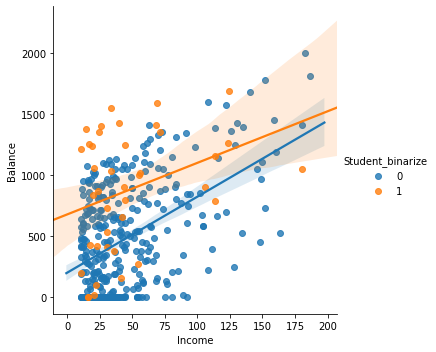

In [63]:
sns.lmplot(x="Income", y="Balance", hue="Student_binarize", data = df)

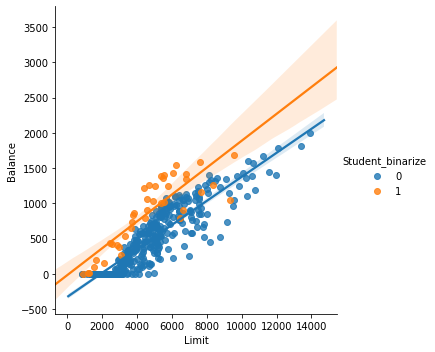

In [66]:
sns.lmplot(x="Limit", y="Balance", hue="Student_binarize", data= df)

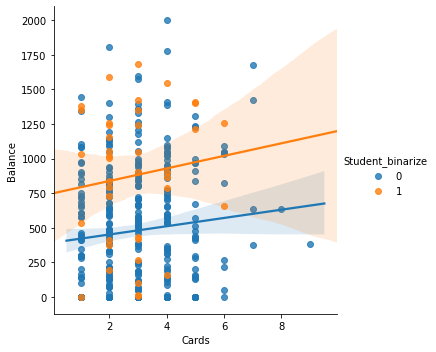

In [68]:
sns.lmplot(x="Cards", y="Balance", hue="Student_binarize", data = df)